# Name: Jacques WEULASSAGOU
# Email: jacques_weulassagou@berkeley.edu

In [137]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

In [138]:
raw = pd.read_csv("screening_exercise_orders_v201810.csv")
raw.head()

,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.5,1
1,1001,0,2017-01-01 00:29:56,338.0,1
2,1002,1,2017-01-01 01:30:31,733.0,1
3,1003,1,2017-01-01 01:34:22,772.0,1
4,1004,0,2017-01-01 03:11:54,508.0,1


In [139]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       13471 non-null  int64  
 1   gender            13471 non-null  int64  
 2   date              13471 non-null  object 
 3   value             13471 non-null  float64
 4   predicted_gender  13471 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 526.3+ KB


In [140]:
raw.describe()

,customer_id,gender,value,predicted_gender
count,13471.000000,13471.000000,13471.000000,13471.000000
mean,5033.693564,0.498256,357.322179,0.642788
std,2500.179222,0.500016,387.210821,0.479196
min,1000.000000,0.000000,0.000000,0.000000
25%,2890.500000,0.000000,161.200000,0.000000
50%,4850.000000,0.000000,258.000000,1.000000
75%,7157.000000,1.000000,426.000000,1.000000
max,9813.000000,1.000000,8046.300000,1.000000


### A) Assemble a dataframe with one row per customer.

In [141]:
#First we create a dataset with one single occurence of each customer, the one with the most recent order date
customer_recent_order = raw.sort_values("date", ascending = False)
print(len(a))
customer_recent_order = customer_recent_order.drop_duplicates("customer_id", keep = 'first')
customer_recent_order.rename(columns = {"date":"most_recent_order_date"}, inplace = True)
print(len(customer_recent_order),"after drop")
print("Here are the customers with the most recent order dates")
customer_recent_order.head()

8814
8814 after drop
Here are the customers with the most recent order dates


,customer_id,gender,most_recent_order_date,value,predicted_gender
13470,8658,0,2017-12-31 23:35:09,306.60,1
13469,9813,0,2017-12-31 23:11:02,534.00,1
13468,9812,0,2017-12-31 23:01:10,153.00,1
13467,9811,1,2017-12-31 22:24:06,148.60,0
13466,9810,1,2017-12-31 22:16:20,794.44,0


In [142]:
# Double check is the number of unique customer is the same as those remaining in dataset a 
len(data.customer_id.unique()) == len(customer_recent_order)

True

In [143]:
#Then we create a dataset with unique customer id by the number of orders 
grouped = raw.groupby("customer_id")
order_count = grouped.count()[["date"]]
order_count.rename(columns = {"date":"order_count"}, inplace = True)
order_count.reset_index(inplace = True)
order_count.head()

,customer_id,order_count
0,1000,1
1,1001,1
2,1002,3
3,1003,4
4,1004,1


In [144]:
#Double check if order_count id the same length as the number of unique customers
len(order_count) == len(customer_recent_order)

True

In [145]:
#Now we merge the two datasets
customer = pd.merge(customer_recent_order, order_count, how='inner', on="customer_id")
customer.sort_values("customer_id", ascending = True, inplace = True)
customer = customer[["customer_id","gender","most_recent_order_date","order_count"]]
customer.head(10)

,customer_id,gender,most_recent_order_date,order_count
8813,1000,0,2017-01-01 00:11:31,1
8812,1001,0,2017-01-01 00:29:56,1
7822,1002,1,2017-02-19 21:35:31,3
6378,1003,1,2017-04-26 02:37:20,4
8811,1004,0,2017-01-01 03:11:54,1
486,1005,1,2017-12-16 01:39:27,2
6103,1006,1,2017-05-09 15:27:20,3
8810,1007,0,2017-01-01 15:59:50,1
450,1008,0,2017-12-17 05:47:48,3
8809,1009,1,2017-01-01 19:27:17,1


### B) Plot the count of orders per week for the store.

In [146]:
raw.date = pd.to_datetime(raw.date, format='%Y-%m-%d %H:%M:%S')

In [147]:
orders = raw.groupby(raw.date.dt.week).count()

In [160]:
orders[["customer_id"]].head()

,customer_id
date,
1,180
2,264
3,405
4,233
5,211


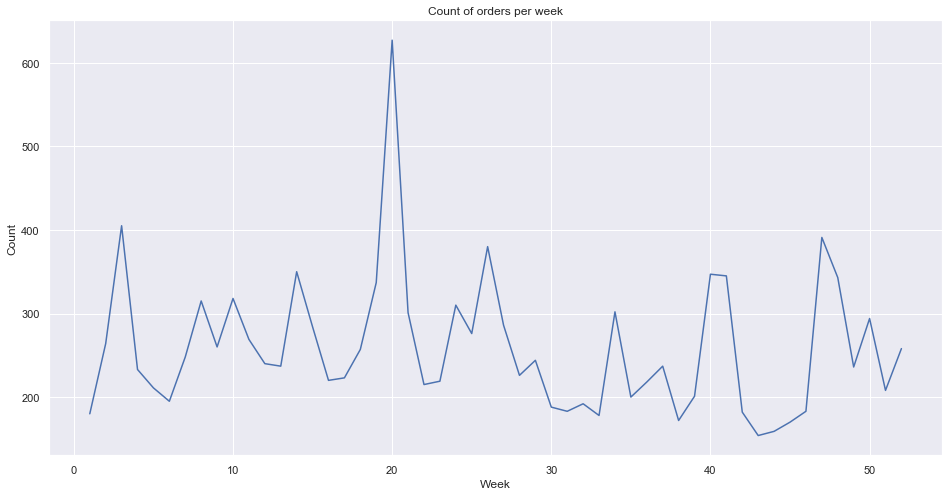

In [149]:
plt.figure(figsize = (16,8))
sns.lineplot(x=orders.index, y='customer_id', data = orders) #we can choose any column
plt.ylabel('Count')
plt.xlabel('Week')
plt.title('Count of orders per week');

### C) Plot the count of orders per week for the store.

In [150]:
gender_value = raw.groupby('gender').mean()
gender_value

,customer_id,value,predicted_gender
gender,,,
0,5032.640331,363.890006,0.504513
1,5034.754172,350.708361,0.782032


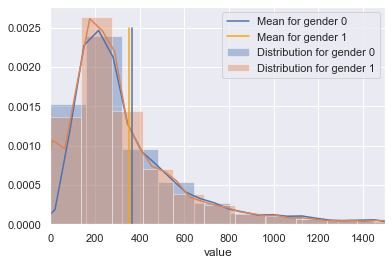

In [151]:
sns.distplot(raw[raw.gender == 0].value, label = 'Distribution for gender 0')
sns.distplot(raw[raw.gender == 1].value, label = 'Distribution for gender 1')

mean0 = gender_value.iloc[0].value
mean1 = gender_value.iloc[1].value
plt.plot([mean0, mean0], [0, 0.0025], label = 'Mean for gender 0', color='b')
plt.plot([mean1, mean1], [0, 0.0025], label = 'Mean for gender 1', color='orange')
plt.legend()
plt.xlim(0,1500);

We can see that the value for both gender are not normally distributed. However, according to the central limit theorem, their mean follow a normal distribution. Thus, we will apply a z-test to assess the significance of the difference between the two means.

We perform a z-test:  **significance level 5%**

<br> H0:  mean0 = mean1
<br> H1:  mean0 =! mean1


In [152]:
from scipy.stats import ttest_ind
#This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values.

ttest_ind(raw[raw.gender == 0].value, raw[raw.gender == 1].value, equal_var = False)

Ttest_indResult(statistic=1.976107933576866, pvalue=0.04816296295128402)

We have **pvalue < 5%**. Therefore, we can reject the null hypothesis with a confidence of 95.19%.
<br> **The difference between `mean0` and `mean1` is significant**

### D)  Generate a confusion matrix for the gender predictions of customers in this dataset.

In [112]:
raw.head()

,customer_id,gender,date,value,predicted_gender,week
0,1000,0,2017-01-01 00:11:31,198.5,1,Sunday
1,1001,0,2017-01-01 00:29:56,338.0,1,Sunday
2,1002,1,2017-01-01 01:30:31,733.0,1,Sunday
3,1003,1,2017-01-01 01:34:22,772.0,1,Sunday
4,1004,0,2017-01-01 03:11:54,508.0,1,Sunday


In [113]:
actual = pd.Series(raw.gender, name='actual')
predicted = pd.Series(raw.predicted_gender, name = 'predicted')
df_confusion = pd.crosstab(actual, predicted)

In [114]:
df_confusion

predicted,0,1
actual,,
0,3349,3410
1,1463,5249


In [115]:
TN = df_confusion.loc[0,0]
TP = df_confusion.loc[1,1]
FP = df_confusion.loc[0,1]
FN = df_confusion.loc[1,0]

In [156]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)
F1 = 2*(precision*recall)/(precision + recall)

In [159]:
print('Accuracy: {:.2f}%'.format(100*accuracy))
print('Recall: {:.2f}%'.format(100*recall))
print('Precision: {:.2f}%'.format(100*precision))
print('F1 score: {:.2f}%'.format(100*F1)) # we can't decide how to fix beta without context

Accuracy: 63.83%
Recall: 78.20%
Precision: 60.62%
F1 score: 68.30%


**Interpretation of the confusion matrix**
<br> **Accuracy:** Each time we make a prediction, we are right with a probability of 64% 
<br> **Precision:** Each time we predict 1, we are right with a probability of 61% 
<br> **Recall:** When it is actually 1, we are right with a probability of 78% 

### E) Describe your favorite tool

One of my favorite algorithms is **k-means**. It's a relatively easy clustering algorithm to implement, scales to large data sets and generalizes to clusters of different shapes and sizes, such as elliptical clusters. I had the opportunity to work as a data scientist consultant for a start-up this semester. The company is an online retailer for health and wellness products in the Middle East and North Africa. I also teamed up with 2 MBA. They wanted to move from not only a marketplace but also e-commerce and enter new markets. I proposed them to segment their clients to have a better understanding of their consumption habits. I used k-means to identify segments of customers. We discovered different groups, mostly depending on their location and also the quality of products consumed. Then, I helped the marketing team to design new marketing campaigns, targeted to the group of customers and geographical areas that generate the most revenue.   

## Thank you for your time!!